## 1.0. Preliminaries

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.units import UnitsWarning
import warnings
from lsst.rsp import get_tap_service, retrieve_query

import healpy as hp
import math
import gc

In [2]:
warnings.simplefilter("ignore", category=UnitsWarning)
pandas.set_option('display.max_rows', 200)

In [3]:
%matplotlib inline

## 2.0. Query TAP server

The <a href="dp0-2.lsst.io">DP0.2 Documentation</a> contains a <a href="https://dp0-2.lsst.io/data-products-dp0-2/index.html#catalogs">list of all DP0.2 catalogs</a>, and also a link to the <a href="https://dm.lsst.org/sdm_schemas/browser/dp02.html">DP0.2 Schema Browser</a> where users can read about the available tables and their contents.

Alternatively, the Portal Aspect of the Rubin Science Platform can be used to browse catalog data.

Below, we show how to browse catalog data from a Notebook using the TAP service.

To access tables, we will use the TAP service in a similar manner to what we showed in the [Intro to DP0 notebook](https://github.com/rubin-dp0/tutorial-notebooks/blob/main/01_Intro_to_DP0_Notebooks.ipynb), and explored further in the [TAP tutorial notebook](https://github.com/rubin-dp0/tutorial-notebooks/blob/main/02_Intermediate_TAP_Query.ipynb). See those notebooks for more details.

In [4]:
service = get_tap_service()

### 2.1 Download all SNe from TruthSummary table.

In [5]:
%%time
# This cell takes about 1 minute...

query = """SELECT * FROM dp02_dc2_catalogs.MatchesTruth WHERE truth_type=3"""

print(query)

results = service.search(query)
df_mt3 = results.to_table().to_pandas()
del results

df_mt3

SELECT * FROM dp02_dc2_catalogs.MatchesTruth WHERE truth_type=3
CPU times: user 6.67 s, sys: 220 ms, total: 6.89 s
Wall time: 54 s


id    id_truth_type  match_candidate  match_chisq  \
0       MS_10449_1352  MS_10449_1352_3            False          NaN   
1       MS_10449_1540  MS_10449_1540_3            False          NaN   
2       MS_10449_1149  MS_10449_1149_3            False          NaN   
3       MS_10449_1215  MS_10449_1215_3            False          NaN   
4       MS_10449_1006  MS_10449_1006_3            False          NaN   
...               ...              ...              ...          ...   
418180   MS_8920_1824   MS_8920_1824_3            False          NaN   
418181   MS_8920_1868   MS_8920_1868_3            False          NaN   
418182   MS_8920_1656   MS_8920_1656_3            False          NaN   
418183   MS_8920_1687   MS_8920_1687_3            False          NaN   
418184   MS_8920_2209   MS_8920_2209_3            False          NaN   

        match_count  match_n_chisq_finite  match_objectId  truth_type  
0                 0                     0            <NA>           3  
1                 0                     0            <NA>           3  
2                 0                     0            <NA>           3  
3                 0                     0            <NA>           3  
4                 0                     0            <NA>           3  
...             ...                   ...             ...         ...  
418180            0                     0            <NA>           3  
418181            0                     0            <NA>           3  
418182            0                     0            <NA>           3  
418183            0                     0            <NA>           3  
418184            0                     0            <NA>           3  

[418185 rows x 8 columns]

Note that this is the same number of entries that Akshita found.

### 2.2 Download all SNe from TruthSummary table within an RA/DEC box of within a box 62.0<ra<62.5 and -37.5<dec<-37.0.

(We restrict the box size to save time for this quick analysis.)

In [6]:
%%time
# This cell takes about 1.5 minutes...

query = """SELECT * FROM dp02_dc2_catalogs.TruthSummary 
           WHERE 
           truth_type=3  
           AND 
           ra BETWEEN 62.0 AND 62.5
           AND
           dec BETWEEN -37.5 AND -37.0
        """

print(query)

results = service.search(query)
df_ts3 = results.to_table().to_pandas()
del results

df_ts3

SELECT * FROM dp02_dc2_catalogs.TruthSummary 
           WHERE 
           truth_type=3  
           AND 
           ra BETWEEN 62.0 AND 62.5
           AND
           dec BETWEEN -37.5 AND -37.0
        
CPU times: user 35.4 ms, sys: 4.06 ms, total: 39.5 ms
Wall time: 1min 35s


cosmodc2_hp  cosmodc2_id        dec  flux_g  flux_g_noMW  flux_i  \
0             -1           -1 -37.000259     0.0          0.0     0.0   
1             -1           -1 -37.046516     0.0          0.0     0.0   
2             -1           -1 -37.041932     0.0          0.0     0.0   
3             -1           -1 -37.023206     0.0          0.0     0.0   
4             -1           -1 -37.057500     0.0          0.0     0.0   
..           ...          ...        ...     ...          ...     ...   
259           -1           -1 -37.009532     0.0          0.0     0.0   
260           -1           -1 -37.008673     0.0          0.0     0.0   
261           -1           -1 -37.005657     0.0          0.0     0.0   
262           -1           -1 -37.005582     0.0          0.0     0.0   
263           -1           -1 -37.000954     0.0          0.0     0.0   

     flux_i_noMW  flux_r  flux_r_noMW  flux_u  ...  flux_z_noMW  host_galaxy  \
0            0.0     0.0          0.0     0.0  ...          0.0        82332   
1            0.0     0.0          0.0     0.0  ...          0.0        19758   
2            0.0     0.0          0.0     0.0  ...          0.0   7938033031   
3            0.0     0.0          0.0     0.0  ...          0.0   7938864126   
4            0.0     0.0          0.0     0.0  ...          0.0   7938862386   
..           ...     ...          ...     ...  ...          ...          ...   
259          0.0     0.0          0.0     0.0  ...          0.0   7938517422   
260          0.0     0.0          0.0     0.0  ...          0.0   7937580820   
261          0.0     0.0          0.0     0.0  ...          0.0   7937581805   
262          0.0     0.0          0.0     0.0  ...          0.0   7937875757   
263          0.0     0.0          0.0     0.0  ...          0.0         2957   

               id   id_truth_type  is_pointsource  is_variable mag_r  \
0     hl_ms_82332   hl_ms_82332_3               1            1   NaN   
1     hl_ms_19758   hl_ms_19758_3               1            1   NaN   
2    MS_9814_1119  MS_9814_1119_3               1            1   NaN   
3    MS_9814_2658  MS_9814_2658_3               1            1   NaN   
4    MS_9814_2477  MS_9814_2477_3               1            1   NaN   
..            ...             ...             ...          ...   ...   
259  MS_9814_2054  MS_9814_2054_3               1            1   NaN   
260   MS_9814_174   MS_9814_174_3               1            1   NaN   
261   MS_9814_121   MS_9814_121_3               1            1   NaN   
262   MS_9814_693   MS_9814_693_3               1            1   NaN   
263    hl_ms_2957    hl_ms_2957_3               1            1   NaN   

            ra  redshift  truth_type  
0    62.437956  1.377610           3  
1    62.439739  0.746906           3  
2    62.445575  0.572340           3  
3    62.454993  0.806976           3  
4    62.461244  0.781336           3  
..         ...       ...         ...  
259  62.421023  0.734660           3  
260  62.048720  0.290050           3  
261  62.193314  0.278944           3  
262  62.104207  0.497613           3  
263  62.135855  0.387740           3  

[264 rows x 24 columns]

### 2.3 Download all SNe from DiaObject table within an RA/DEC box of within a box 62.0<ra<62.5 and -37.5<dec<-37.0.

(We restrict the box size to save time for this quick analysis.)

In [7]:
%%time
# This cell takes about half a minute...

query = """SELECT ra, decl, diaObjectid, rPSFluxMax FROM dp02_dc2_catalogs.DiaObject
            WHERE 
            ra BETWEEN 62.0 AND 62.5
            AND
            decl BETWEEN -37.5 AND -37.0
        """

print(query)

results = service.search(query)
df_do = results.to_table().to_pandas()
del results

df_do

SELECT ra, decl, diaObjectid, rPSFluxMax FROM dp02_dc2_catalogs.DiaObject
            WHERE 
            ra BETWEEN 62.0 AND 62.5
            AND
            decl BETWEEN -37.5 AND -37.0
        
CPU times: user 639 ms, sys: 8.65 ms, total: 647 ms
Wall time: 31.6 s


ra       decl          diaObjectid   rPSFluxMax
0      62.080433 -37.335288  1567956357766716859  1135.428626
1      62.167144 -37.184204  1567956357766718341          NaN
2      62.038234 -37.360791  1567956357766718331  -510.689848
3      62.179867 -37.166055  1567956357766718218          NaN
4      62.089113 -37.342071  1567956357766716858          NaN
...          ...        ...                  ...          ...
45306  62.132071 -37.000591  1651281746966088669          NaN
45307  62.131649 -37.001738  1651281746966088668          NaN
45308  62.010890 -37.000247  1651281746966089411          NaN
45309  62.152797 -37.001733  1651281746966089220  2517.761732
45310  62.169666 -37.001746  1651281746966089166          NaN

[45311 rows x 4 columns]

## 3.0 Matching the DiaObject table with the TruthSummary table

Unfortunately, at the current time, there is no equivalent of the **MatchesTruth** table for the Dia tables.  The **MatchesTruth** table only has matches to the **Objects** table.  (The `match_objectid` column in the **MatchesTruth** table holds the `objectid` from the corresponding entry in the **Objects** table.)

Until there is a equivalent match id for Dia objects (or Dia sources), we must do the match ourselves.  An imperfect -- but still pretty good - means of matching is to match healpixel values for the RAs/DECs of the entries in the Dia table and the **TruthSummary** table.

In the following, we will do this for a subsamples of the **DiaObjects** and the **TruthSummary** tables we downloaded above (i.e., for a box 62.0<ra<62.5 and -37.5<dec<-37.0).

First, we define a couple of modules that make use of healpy.  These were copied from <a href="https://github.com/DouglasLeeTucker/DECam_PGCM/blob/master/python/healpixTools.py">this link</a>:

In [8]:
# Healpix tools.
#  From Sahar Allam (2016.07.08)

##################################
def radec2thetaphi(ra, dec):
    import numpy as np
    return (90-dec)*np.pi/180., ra*np.pi/180.

##################################
#DESDM uses nside=128, nest=True
#Alex Drlica Wagner's healpixelated Gaia DR2 on des40 uses nside=32, nest=False
def getipix(nside,ra,dec,nest=True):
    import healpy as hp
    theta, phi = radec2thetaphi(ra, dec)
    ipix = hp.pixelfunc.ang2pix(nside, theta, phi, nest)
    return ipix

##################################


To do a suitable match, we want to chose a healpixel area that is pretty small.  A healpixel of  `NSIDES` = 2^17 seems not unreasonable:

In [9]:
nside=2**17
# Area in sq arcsec:
area = 3600.*3600.*hp.pixelfunc.nside2pixarea(nside, degrees=True)
# A rough measure of length in arcsec: 
length = math.sqrt(area)
print(nside, area, length)

131072 2.593337450489216 1.6103842555394088


Let's add an "`NSIDES`=2^17" healpixel column to our **TruthSummary** DataFrame:

In [10]:
df_ts3.loc[:,'HPX_2_17'] = getipix(nside, df_ts3.loc[:,'ra'].values, df_ts3.loc[:,'dec'].values)
df_ts3

cosmodc2_hp  cosmodc2_id        dec  flux_g  flux_g_noMW  flux_i  \
0             -1           -1 -37.000259     0.0          0.0     0.0   
1             -1           -1 -37.046516     0.0          0.0     0.0   
2             -1           -1 -37.041932     0.0          0.0     0.0   
3             -1           -1 -37.023206     0.0          0.0     0.0   
4             -1           -1 -37.057500     0.0          0.0     0.0   
..           ...          ...        ...     ...          ...     ...   
259           -1           -1 -37.009532     0.0          0.0     0.0   
260           -1           -1 -37.008673     0.0          0.0     0.0   
261           -1           -1 -37.005657     0.0          0.0     0.0   
262           -1           -1 -37.005582     0.0          0.0     0.0   
263           -1           -1 -37.000954     0.0          0.0     0.0   

     flux_i_noMW  flux_r  flux_r_noMW  flux_u  ...  host_galaxy            id  \
0            0.0     0.0          0.0     0.0  ...        82332   hl_ms_82332   
1            0.0     0.0          0.0     0.0  ...        19758   hl_ms_19758   
2            0.0     0.0          0.0     0.0  ...   7938033031  MS_9814_1119   
3            0.0     0.0          0.0     0.0  ...   7938864126  MS_9814_2658   
4            0.0     0.0          0.0     0.0  ...   7938862386  MS_9814_2477   
..           ...     ...          ...     ...  ...          ...           ...   
259          0.0     0.0          0.0     0.0  ...   7938517422  MS_9814_2054   
260          0.0     0.0          0.0     0.0  ...   7937580820   MS_9814_174   
261          0.0     0.0          0.0     0.0  ...   7937581805   MS_9814_121   
262          0.0     0.0          0.0     0.0  ...   7937875757   MS_9814_693   
263          0.0     0.0          0.0     0.0  ...         2957    hl_ms_2957   

      id_truth_type  is_pointsource  is_variable  mag_r         ra  redshift  \
0     hl_ms_82332_3               1            1    NaN  62.437956  1.377610   
1     hl_ms_19758_3               1            1    NaN  62.439739  0.746906   
2    MS_9814_1119_3               1            1    NaN  62.445575  0.572340   
3    MS_9814_2658_3               1            1    NaN  62.454993  0.806976   
4    MS_9814_2477_3               1            1    NaN  62.461244  0.781336   
..              ...             ...          ...    ...        ...       ...   
259  MS_9814_2054_3               1            1    NaN  62.421023  0.734660   
260   MS_9814_174_3               1            1    NaN  62.048720  0.290050   
261   MS_9814_121_3               1            1    NaN  62.193314  0.278944   
262   MS_9814_693_3               1            1    NaN  62.104207  0.497613   
263    hl_ms_2957_3               1            1    NaN  62.135855  0.387740   

     truth_type      HPX_2_17  
0             3  144409004876  
1             3  144408279889  
2             3  144408280312  
3             3  144408980376  
4             3  144408278108  
..          ...           ...  
259           3  144408305593  
260           3  144408572904  
261           3  144408724735  
262           3  144408741459  
263           3  144408722563  

[264 rows x 25 columns]

Likewise, let's add an "`NSIDES`=2^17" healpixel column to our **DiaObjects** DataFrame:

In [12]:
df_do.loc[:,'HPX_2_17'] = getipix(nside, df_do.loc[:,'ra'].values, df_do.loc[:,'decl'].values)
df_do

ra       decl          diaObjectid   rPSFluxMax      HPX_2_17
0      62.080433 -37.335288  1567956357766716859  1135.428626  144407968279
1      62.167144 -37.184204  1567956357766718341          NaN  144408404242
2      62.038234 -37.360791  1567956357766718331  -510.689848  144405517493
3      62.179867 -37.166055  1567956357766718218          NaN  144408405375
4      62.089113 -37.342071  1567956357766716858          NaN  144407966415
...          ...        ...                  ...          ...           ...
45306  62.132071 -37.000591  1651281746966088669          NaN  144408721914
45307  62.131649 -37.001738  1651281746966088668          NaN  144408721902
45308  62.010890 -37.000247  1651281746966089411          NaN  144414166096
45309  62.152797 -37.001733  1651281746966089220  2517.761732  144408721217
45310  62.169666 -37.001746  1651281746966089166          NaN  144408726315

[45311 rows x 5 columns]

Now, let's match both DataFrames using an inner join on their `HPX_2_17` columns:

In [15]:
df_merged = pd.merge(df_ts3, df_do, how='inner', on=['HPX_2_17','HPX_2_17'])
df_merged

cosmodc2_hp  cosmodc2_id        dec  flux_g  flux_g_noMW  flux_i  \
0            -1           -1 -37.041932     0.0          0.0     0.0   
1            -1           -1 -37.042508     0.0          0.0     0.0   
2            -1           -1 -37.038767     0.0          0.0     0.0   
3            -1           -1 -37.015392     0.0          0.0     0.0   
4            -1           -1 -37.459984     0.0          0.0     0.0   
5            -1           -1 -37.213406     0.0          0.0     0.0   
6            -1           -1 -37.213406     0.0          0.0     0.0   
7            -1           -1 -37.447460     0.0          0.0     0.0   
8            -1           -1 -37.447460     0.0          0.0     0.0   
9            -1           -1 -37.239213     0.0          0.0     0.0   
10           -1           -1 -37.239213     0.0          0.0     0.0   
11           -1           -1 -37.239213     0.0          0.0     0.0   
12           -1           -1 -37.249436     0.0          0.0     0.0   
13           -1           -1 -37.437345     0.0          0.0     0.0   
14           -1           -1 -37.492223     0.0          0.0     0.0   
15           -1           -1 -37.230319     0.0          0.0     0.0   
16           -1           -1 -37.212257     0.0          0.0     0.0   
17           -1           -1 -37.212257     0.0          0.0     0.0   
18           -1           -1 -37.199453     0.0          0.0     0.0   
19           -1           -1 -37.199453     0.0          0.0     0.0   
20           -1           -1 -37.342588     0.0          0.0     0.0   
21           -1           -1 -37.342588     0.0          0.0     0.0   
22           -1           -1 -37.342588     0.0          0.0     0.0   
23           -1           -1 -37.342588     0.0          0.0     0.0   
24           -1           -1 -37.347207     0.0          0.0     0.0   
25           -1           -1 -37.166878     0.0          0.0     0.0   
26           -1           -1 -37.166878     0.0          0.0     0.0   
27           -1           -1 -37.166598     0.0          0.0     0.0   
28           -1           -1 -37.166598     0.0          0.0     0.0   
29           -1           -1 -37.184418     0.0          0.0     0.0   
30           -1           -1 -37.184418     0.0          0.0     0.0   
31           -1           -1 -37.184418     0.0          0.0     0.0   
32           -1           -1 -37.184418     0.0          0.0     0.0   
33           -1           -1 -37.124042     0.0          0.0     0.0   
34           -1           -1 -37.110491     0.0          0.0     0.0   
35           -1           -1 -37.060105     0.0          0.0     0.0   
36           -1           -1 -37.149407     0.0          0.0     0.0   
37           -1           -1 -37.142970     0.0          0.0     0.0   
38           -1           -1 -37.141589     0.0          0.0     0.0   
39           -1           -1 -37.141589     0.0          0.0     0.0   
40           -1           -1 -37.141589     0.0          0.0     0.0   
41           -1           -1 -37.134003     0.0          0.0     0.0   
42           -1           -1 -37.088817     0.0          0.0     0.0   
43           -1           -1 -37.143354     0.0          0.0     0.0   
44           -1           -1 -37.143354     0.0          0.0     0.0   
45           -1           -1 -37.146992     0.0          0.0     0.0   
46           -1           -1 -37.212421     0.0          0.0     0.0   
47           -1           -1 -37.212421     0.0          0.0     0.0   
48           -1           -1 -37.212421     0.0          0.0     0.0   
49           -1           -1 -37.301966     0.0          0.0     0.0   
50           -1           -1 -37.485977     0.0          0.0     0.0   
51           -1           -1 -37.485977     0.0          0.0     0.0   
52           -1           -1 -37.428823     0.0          0.0     0.0   
53           -1           -1 -37.336556     0.0          0.0     0.0   
54           -1           -1 -37.254336     

How do the RA's/DEC's from the two merged tables compare?

In [16]:
df_merged['diff_ra'] = 3600.*(df_merged['ra_x'] - df_merged['ra_y'])
df_merged['diff_dec'] = 3600.*(df_merged['dec'] - df_merged['decl'])

array([[<AxesSubplot:title={'center':'diff_ra'}>]], dtype=object)

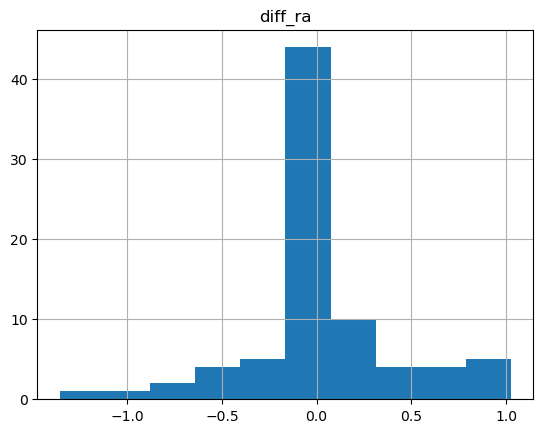

In [17]:
df_merged.hist('diff_ra')

array([[<AxesSubplot:title={'center':'diff_dec'}>]], dtype=object)

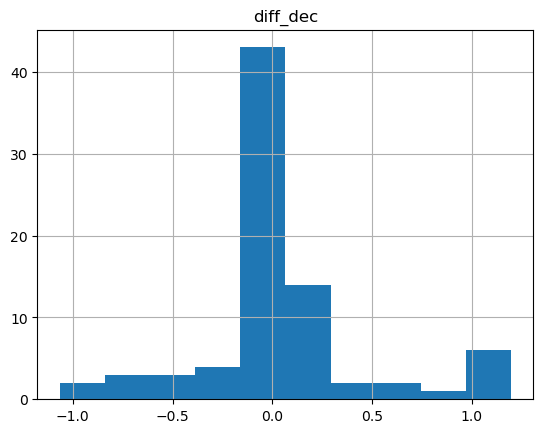

In [18]:
df_merged.hist('diff_dec')

Not too bad.  Contamination is probably relatively low, and purity is probably relatively high.  For better results, an improved sky matching algorithm can be employed.